<a href="https://colab.research.google.com/github/arbceiust/MATH3790_2020S/blob/master/basics_of_machine_learning_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This Work book explores:

1. Various stages Exploring/Cleaning/Feature-Engineering/Input-Output preparation of processing data
2. Basics of Gradient Descent
3. Linear Regression Model
4. Cost Function
5. Gradient Descent
6. Prediction

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Now we are going on to our first expedition into machine learning!  Trying to predict the sale prices of a home, knowing the sale prices of many others in the same area

In [0]:
#Download the data "http://gauss.kean.edu/python_workshop/wdi_urbanpopulation.csv"
#Or load it from the disk
#housing_df = pd.read_excel("bay_area_home_prices.xlsx")

In [0]:
#import pickle
#housing_df.to_pickle('bay_area_home_prices.pkl')

In [0]:
import pickle
#Drop the pesky "Unnamed:0" column while reading the data
housing_df = pd.read_pickle('bay_area_home_prices.pkl').drop('Unnamed: 0',axis=1)

In [0]:
housing_df.head()

,address,info,z_address,bathrooms,bedrooms,finishedsqft,lastsolddate,lastsoldprice,latitude,longitude,neighborhood,totalrooms,usecode,yearbuilt,zestimate,zindexvalue,zipcode,zpid
0,Address: 1160 Mission Street #2007,San FranciscoSales price: 1300000Sales date: 0...,1160 Mission St UNIT 2007,2.0,2,1043,2016-02-17,1300000,37.778705,-122.412635,South of Market,4,Condominium,2007,1167508,975700,94103,83152781
1,Address: 260 King Street #475,San FranciscoSales price: 750000Sales date: 02...,260 King St UNIT 475,1.0,1,903,2016-02-17,750000,37.777641,-122.393417,South of Market,3,Condominium,2004,823719,975700,94107,69819817
2,Address: 560 Missouri Street #B,San FranciscoSales price: 1495000Sales date: 0...,560 Missouri St # B,4.0,3,1425,2016-02-17,1495000,37.759198,-122.396516,Potrero Hill,6,Condominium,2003,1708594,1277600,94107,64972847
3,Address: 350 Missouri Street,San FranciscoSales price: 2700000Sales date: 0...,350 Missouri St,3.0,3,2231,2016-02-17,2700000,37.761886,-122.396769,Potrero Hill,10,SingleFamily,1927,2411236,1277600,94107,15149489
4,Address: 3658 Folsom Street,San FranciscoSales price: 1530000Sales date: 0...,3658 Folsom St,3.0,3,1300,2016-02-17,1530000,37.740795,-122.413453,Bernal Heights,4,SingleFamily,1900,1918539,1248000,94110,15161978


## Step 1: Explore the data

In [0]:
#Column names
housing_df.columns

Index(['address', 'info', 'z_address', 'bathrooms', 'bedrooms', 'finishedsqft',
       'lastsolddate', 'lastsoldprice', 'latitude', 'longitude',
       'neighborhood', 'totalrooms', 'usecode', 'yearbuilt', 'zestimate',
       'zindexvalue', 'zipcode', 'zpid'],
      dtype='object')

In [0]:
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11330 entries, 0 to 11329
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   address        11330 non-null  object        
 1   info           11330 non-null  object        
 2   z_address      11330 non-null  object        
 3   bathrooms      11330 non-null  float64       
 4   bedrooms       11330 non-null  int64         
 5   finishedsqft   11330 non-null  int64         
 6   lastsolddate   11330 non-null  datetime64[ns]
 7   lastsoldprice  11330 non-null  int64         
 8   latitude       11330 non-null  float64       
 9   longitude      11330 non-null  float64       
 10  neighborhood   11330 non-null  object        
 11  totalrooms     11330 non-null  int64         
 12  usecode        11330 non-null  object        
 13  yearbuilt      11330 non-null  int64         
 14  zestimate      11330 non-null  int64         
 15  zindexvalue    1133

In [0]:
housing_df.describe()

,bathrooms,bedrooms,finishedsqft,lastsoldprice,latitude,longitude,totalrooms,yearbuilt,zestimate,zindexvalue,zipcode,zpid
count,11330.000000,11330.000000,11330.000000,1.133000e+04,11330.000000,11330.000000,11330.000000,11330.000000,1.133000e+04,1.133000e+04,11330.000000,1.133000e+04
mean,1.980229,2.614475,1585.420918,1.263928e+06,37.759711,-122.436518,6.111562,1948.498147,1.565695e+06,1.320205e+06,94116.912004,3.689973e+07
std,1.047358,1.299457,921.978245,1.042079e+06,0.025578,0.030743,12.125819,37.911196,1.229417e+06,5.848170e+05,9.400877,7.800741e+07
min,0.500000,0.000000,1.000000,5.350000e+02,37.708170,-122.510726,1.000000,1860.000000,4.323850e+05,6.881000e+05,94102.000000,1.506329e+07
25%,1.000000,2.000000,1019.000000,7.292500e+05,37.739286,-122.455157,4.000000,1916.000000,9.052375e+05,9.829000e+05,94110.000000,1.510847e+07
50%,2.000000,2.000000,1362.000000,9.900000e+05,37.760513,-122.432510,5.000000,1940.000000,1.230758e+06,1.211900e+06,94115.000000,1.515697e+07
75%,2.000000,3.000000,1876.000000,1.450000e+06,37.781386,-122.413359,7.000000,1986.000000,1.731170e+06,1.480400e+06,94123.000000,5.970040e+07
max,14.000000,20.000000,27275.000000,2.388900e+07,37.806083,-122.381201,1264.000000,2016.000000,1.553325e+07,5.333500e+06,94158.000000,2.146999e+09


In [0]:
#Make a list of column names
housing_df.vars = list(housing_df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


In [0]:
housing_df.vars

['address',
 'info',
 'z_address',
 'bathrooms',
 'bedrooms',
 'finishedsqft',
 'lastsolddate',
 'lastsoldprice',
 'latitude',
 'longitude',
 'neighborhood',
 'totalrooms',
 'usecode',
 'yearbuilt',
 'zestimate',
 'zindexvalue',
 'zipcode',
 'zpid']

In [0]:
#For now pick a few columns that seems numerical: there are several ways to do this
housing_df1 = housing_df[['bedrooms','finishedsqft','totalrooms','lastsoldprice','latitude','longitude','yearbuilt']]
#housing_df1 = housing_df.loc[:,['bedrooms','finishedsqft','totalrooms', 'lastsoldprice','latitude','longitude']]
#housing_df1 = housing_df[housing_df.columns[[4,5, 6,8,9]]]

In [0]:
housing_df1.head()

,bedrooms,finishedsqft,totalrooms,lastsoldprice,latitude,longitude,yearbuilt
0,2,1043,4,1300000,37.778705,-122.412635,2007
1,1,903,3,750000,37.777641,-122.393417,2004
2,3,1425,6,1495000,37.759198,-122.396516,2003
3,3,2231,10,2700000,37.761886,-122.396769,1927
4,3,1300,4,1530000,37.740795,-122.413453,1900


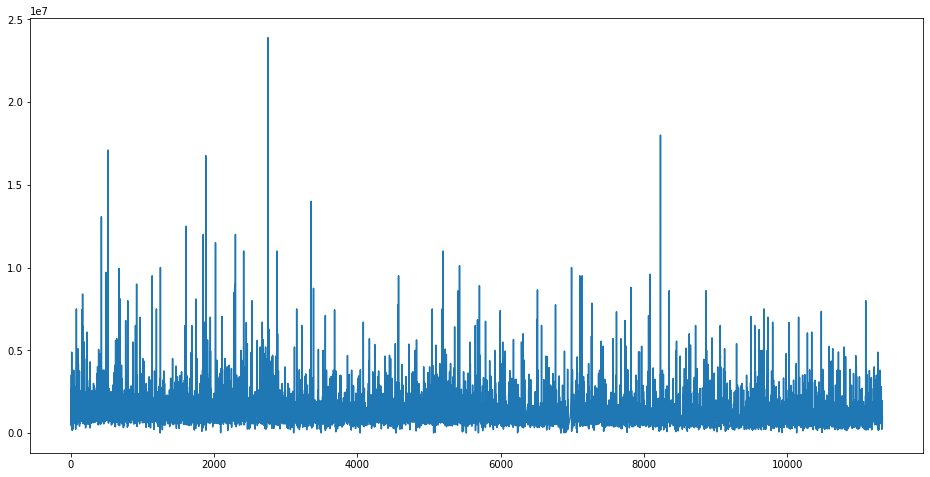

In [0]:
#Here is a most basic plot of one of the variables

plt.figure(figsize=(16,8))
plt.plot(housing_df1['lastsoldprice'])
plt.show()

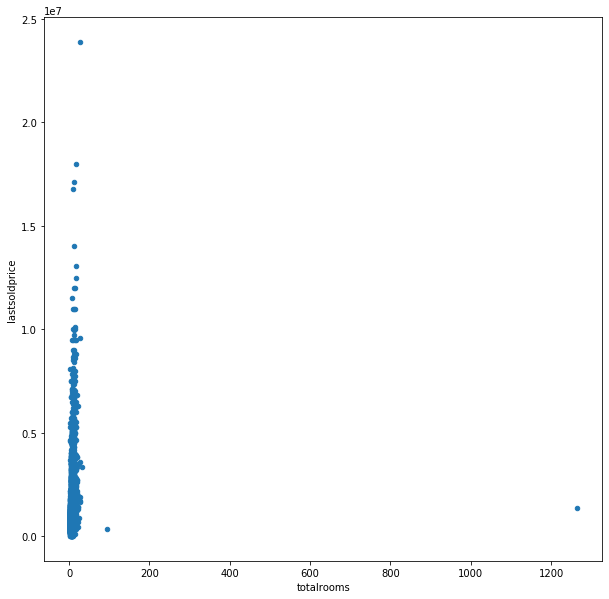

In [0]:
housing_df1.plot.scatter('totalrooms','lastsoldprice', figsize=(10,10))
plt.show()

## Step 2: Preprocessing.  For example:
 - removing outliers
 - removing invalid entries
 - columns/rows that are irrelevant to the task etc.

In [0]:
#Outliers in bedroom count: the total number of rooms exceed 20, delete them!
housing_df1_clean = housing_df1.loc[housing_df1['totalrooms'] <=20]

In [0]:
print(housing_df1.shape)
print(housing_df1_clean.shape)

(11330, 7)
(11309, 7)


In [0]:
housing_df1_clean.head()

,bedrooms,finishedsqft,totalrooms,lastsoldprice,latitude,longitude,yearbuilt
0,2,1043,4,1300000,37.778705,-122.412635,2007
1,1,903,3,750000,37.777641,-122.393417,2004
2,3,1425,6,1495000,37.759198,-122.396516,2003
3,3,2231,10,2700000,37.761886,-122.396769,1927
4,3,1300,4,1530000,37.740795,-122.413453,1900


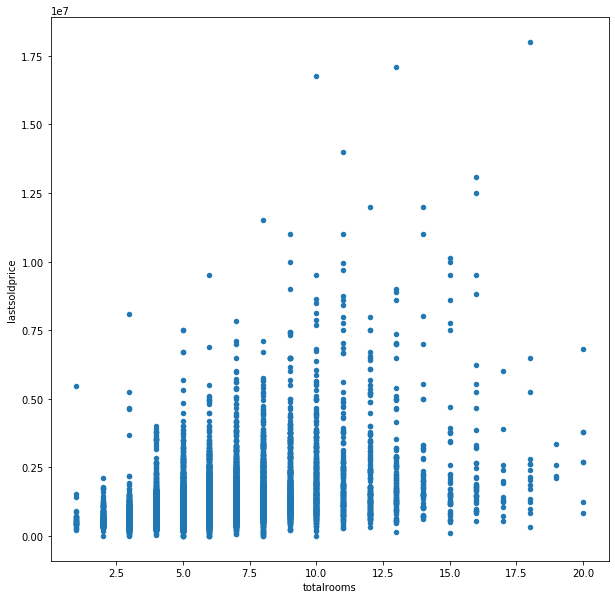

In [0]:
housing_df1_clean.plot.scatter('totalrooms','lastsoldprice', figsize=(10,10))
plt.show()

In [0]:
housing_df1_clean.tail()

,bedrooms,finishedsqft,totalrooms,lastsoldprice,latitude,longitude,yearbuilt
11325,3,2100,10,1950000,37.739623,-122.428899,1900
11326,2,977,5,1030000,37.775184,-122.411567,2006
11327,2,875,4,565000,37.709411,-122.465031,1950
11328,2,697,4,762000,37.755586,-122.508063,1904
11329,3,1539,7,950000,37.734334,-122.413534,1976


## Step 3: Data Engineering:  This part is pretty open but can make the difference, leverage your math/stat skills here.  For example,

- feature mapping
- principle components
- label encoding
- NLP usch as embedding etc.

However you can get the juice out of data do that!

#### Just regression for now

- need to figure the feaures for input matrix - we stick to 3 numerical variables for now
- Need a bias column (intercept) of ones added
- Output is housing prices

In [0]:
#Start working towards a data matrix: We are just going to use the 4 obvious numerical columns
A = np.array(housing_df1_clean.iloc[:,:-4])

In [0]:
A.shape

(11309, 3)

In [0]:
#Add on the intercept
intercept = np.ones(len(A))
#Combine
X = np.c_[intercept,A]
#Target
y = np.array(housing_df1_clean.iloc[:,-3])

In [0]:
X[:5]

array([[1.000e+00, 2.000e+00, 1.043e+03, 4.000e+00],
       [1.000e+00, 1.000e+00, 9.030e+02, 3.000e+00],
       [1.000e+00, 3.000e+00, 1.425e+03, 6.000e+00],
       [1.000e+00, 3.000e+00, 2.231e+03, 1.000e+01],
       [1.000e+00, 3.000e+00, 1.300e+03, 4.000e+00]])

In [0]:
y[:5]

array([37.778705, 37.777641, 37.759198, 37.761886, 37.740795])

### <font color='orange'> Here is the routine linear algebra "least squares method": rearely used in practice </font>

In [0]:
from numpy import linalg as la

In [0]:
Theta = np.dot(la.inv(np.dot(np.transpose(X),X)),np.dot(np.transpose(X),y))

In [0]:
Theta

array([ 3.77678487e+01, -6.89490755e-03,  1.08552751e-05, -1.23034526e-03])

##### So our model is going to be $y ~ 244100 - -46690* bedrooms + 838*finishedsqft - -30946*total\;rooms$

In [0]:
#Or simply
X_test = [1,3,1000, 6]
pred_price = np.dot(Theta.T,X_test)
pred_price

37.750637155458094

The function model we developed is called the **hypothesis**

### <font color='blue'> Gradient descent: iterative solution - widely used outside of mathematics</font>

#### Basic examples:
1.  To find the where the minimum of $f(x) = x^2$ occurs

In [0]:
## initial value 1, learning rate alpha=1/4, number of iterations = 10
x = 1 
alpha = 1/4 
for i in range(10): 
    x = x - alpha*2*x
print(x)

0.0009765625


In [0]:
## initial value 1, learning rate alpha=1, number of iterations = 10
x = 1 
alpha = 1 
for i in range(10): 
    x = x - alpha*2*x
print(x)

1


In [0]:
## initial value 1, learning rate alpha=1/2, number of iterations = 10
x = 1 
alpha = 0.5
for i in range(10): 
    x = x - alpha*2*x
print(x)

0.0


In [0]:
## initial value 1, learning rate alpha=2, number of iterations = 10
x = 1 
alpha = 2 
for i in range(10): 
    x = x - alpha*2*x
print(x)

59049


## Now, the three ingradients to supervised machine learning are:

#### 1.  The general, the linear regression hypothesis function is:  $$h_{\Theta}(X) = \theta_0 + \theta_1x_1 + \theta_2x_2 + ... + \theta_nx_n = \Theta^TX$$

#### 2. The cost function then would be $$ J(\Theta) = \Sigma_{i=1}^{m}(h_{\Theta}(X^{(i)} - y^{(i)})^2  \; where\;\;i=1\;.\;.\;.m$$ 
$\;\;\;\;$ or something like this depnding on the hypothesis

#### 3. And the gradient descent:  $$\Theta_{k+1} = \Theta_{k} - \alpha*grad(J(\Theta_{k}),\;\; k = 0, 1,2,3,...)$$

In [0]:
# Initialize the paarmeter set theta with zeros length as equal to column size in X
theta = np.zeros(X.shape[1])
print(theta)

[0. 0. 0. 0.]


In [0]:
def cost_function(X, y, theta):
    """
    cost_function(X, y, theta) computes the cost of using theta as the
    parameter for linear regression to fit the data points in X and y
    """
    ## number of training examples
    m = len(y) 
    
    ## Calculate the cost with the given parameters
    J = 1/(2*m)*np.sum((X.dot(theta)-y)**2)
    
    return J

In [0]:
cost_function(X,y,theta)

712.8973128387214

In [0]:
#It is very important to scale the features, especially when using iterative solutions
from numpy import linalg as la
from sklearn.preprocessing import MinMaxScaler
#we are going to scale the x & y
x_scaler = MinMaxScaler()
y_scaler = MinMaxScaler()

In [0]:
X = x_scaler.fit_transform(X[:])
y = y_scaler.fit_transform(y.reshape(-1, 1))

In [0]:
def gradient_descent(X, y, theta, alpha, iterations):
    """
    gradient_descent Performs gradient descent to learn theta
    theta = GRADIENTDESENT(X, y, theta, alpha, num_iters) updates theta by 
    taking num_iters gradient steps with learning rate alpha
    """
    
    m = len(y)
    cost_history = [0] * iterations
    
    for iteration in range(iterations):
        hypothesis = X.dot(theta)
        loss = hypothesis-y.ravel()
        gradient = X.T.dot(loss)/m
        theta = theta - alpha*gradient
        cost = cost_function(X, y, theta)
        cost_history[iteration] = cost
        print(cost)

    return theta, cost_history

In [0]:
t,c = gradient_descent(X,y,theta,0.01, 10)

1948.4167947822968
1945.719408226032
1943.0277963025433
1940.3419465745617
1937.661846631763
1934.9874840905666
1932.3188465942087
1929.6559218125317
1926.9986974421136
1924.3471612060362


In [0]:
t

array([0.        , 0.00654788, 0.00307887, 0.01337366])

In [0]:
c

[1948.4167947822968,
 1945.719408226032,
 1943.0277963025433,
 1940.3419465745617,
 1937.661846631763,
 1934.9874840905666,
 1932.3188465942087,
 1929.6559218125317,
 1926.9986974421136,
 1924.3471612060362]